# **Health Services Industry Analysis**

### **Part 1. Quantitative Analysis**

#### **A. Industry Sector Selection and Data Filtering**

In [3]:
# Import core libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load datasets
major_groups = pd.read_csv("major_groups.csv", encoding = 'utf-8')

public_firms = pd.read_csv("public_firms.csv", encoding = 'utf-8')

ten_K_Reports = pd.read_csv("2020_10K_item1_full.csv", encoding = 'utf-8')

Filtering the data in "data/public_firms.csv" to only include the firms belonging to the health services sector:

In [4]:
# Preview first record of the public firms dataset
print(public_firms.head(1))

# Filter firms where the SIC code starts with '80' (health services industry)
ff_firms_dataset = public_firms[public_firms['sic'].astype(str).str[:2] == "80"]

# Display the filtered dataset
ff_firms_dataset.head()

   gvkey  fyear location      conm     ipodate   sic  prcc_c      ch      ni  \
0   1004   1994      USA  AAR CORP  1988/01/01  5080  13.375  22.487  10.463   

     asset     sale       roa  
0  425.814  451.395  0.024572  


,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa
1588,1431,1994,USA,AMERICAN CYTOGENETICS,NaN,8071,NaN,0.035,-0.205,1.339,5.454,-0.153099
1589,1431,1995,USA,AMERICAN CYTOGENETICS,NaN,8071,0.031,0.020,-0.484,1.124,4.682,-0.430605
2064,1559,1995,USA,AMERICAN SHARED HSPTL SERV,NaN,8090,1.312,0.452,7.344,31.345,34.077,0.234296
2065,1559,1996,USA,AMERICAN SHARED HSPTL SERV,NaN,8090,1.812,0.368,-0.353,32.969,36.989,-0.010707
2066,1559,1997,USA,AMERICAN SHARED HSPTL SERV,NaN,8090,1.750,0.017,1.522,30.209,37.172,0.050382


Number of unique firm-year ("fyear") observations in the filtered dataset:


In [5]:
# Count distinct fiscal years in the dataset
unique_years = ff_firms_dataset["fyear"].unique()
count_unique_years = len(unique_years)

print("There are " + str(count_unique_years) + " unique years")

There are 27 unique years


Number of unique firms in the filtered dataset:

In [6]:
# Extract all unique firm identifiers ('gvkey') from the dataset
unique_firms = ff_firms_dataset["gvkey"].unique()

# Count the number of unique firms
count_unique_firms = len(unique_firms)

print("There are " + str(count_unique_firms) + " unique firms")

There are 358 unique firms


Number of firms in the filtered dataset that have records over all 27 years (1994-2020):

In [7]:
# Group the dataset by company ID ('gvkey') and collect the unique fiscal years ('fyear') for each firm
firm_years_count = ff_firms_dataset.groupby("gvkey")["fyear"].unique()

# Filter firms that have records for all 27 years
firm_27_years_count = firm_years_count[firm_years_count.apply(len) == 27]

print(firm_27_years_count)
print("There are " + str(len(firm_27_years_count)) + " firms that have records over all 27 years")

gvkey
7750     [1994, 1995, 1996, 1997, 1998, 1999, 2000, 200...
61483    [1994, 1995, 1996, 1997, 1998, 1999, 2000, 200...
Name: fyear, dtype: object
There are 2 firms that have records over all 27 years


#### **B. Preliminary Analysis**

Top 10 firms with the highest stock price (column "prcc_c") in the year 2020:

In [8]:
# Filter the dataset to include only records for the year 2020
firms_2020 = ff_firms_dataset[(ff_firms_dataset["fyear"] == 2020)]

# Sort the 2020 firms by their stock price ('prcc_c') in descending order and select the top 10 companies with the highest stock prices
top_stock = firms_2020.sort_values("prcc_c" , ascending = False)[0:10]

# Display the gvkey, company name (conm), and stock price (prcc_c) of the top 10 companies
top_stock[["gvkey" , "conm" , "prcc_c"]]

,gvkey,conm,prcc_c
7723,2960,CHEMED CORP,532.61
107521,30612,AMEDISYS INC,293.33
183851,162404,LHC GROUP INC,213.32
58187,14960,LABORATORY CP OF AMER HLDGS,203.55
82137,24249,TELADOC HEALTH INC,199.96
77060,22260,HCA HEALTHCARE INC,164.46
41013,11032,UNIVERSAL HEALTH SVCS INC,137.50
87614,25318,U S PHYSICAL THERAPY INC,120.25
135469,64166,QUEST DIAGNOSTICS INC,119.17
121189,61483,DAVITA INC,117.40


Top 10 firms with the highest sales (column "sale") in the entire history of the dataset:

In [9]:
# Group by company name (conm) and sum the sales for each
grouped_sales = ff_firms_dataset.groupby("conm", as_index=False)[["sale"]].sum()

# Sort by total sales in descending order and take top 10
top10_sales = grouped_sales.sort_values("sale", ascending=False).head(10)

top10_sales

,conm,sale
130,HCA HEALTHCARE INC,765445.000
326,TENET HEALTHCARE CORP,322940.000
117,FRESENIUS MEDICAL CARE AG&CO,270953.523
69,COMMUNITY HEALTH SYSTEMS INC,215654.733
84,DAVITA INC,157702.707
271,QUEST DIAGNOSTICS INC,146895.716
343,UNIVERSAL HEALTH SVCS INC,144328.980
178,LABORATORY CP OF AMER HLDGS,134399.500
174,KINDRED HEALTHCARE INC,96953.895
98,ENCOMPASS HEALTH CORP,82040.121


The geographical distribution (column "location") of all the firms:

In [10]:
# Count unique firms by location and sort descending
location_counts = (
    ff_firms_dataset.groupby("location")["conm"]
    .nunique()
    .sort_values(ascending=False)
    .reset_index()
)

# Rename columns for clarity
location_counts.columns = ["location", "unique_firm_count"]

location_counts

,location,unique_firm_count
0,USA,344
1,CAN,5
2,CHN,5
3,HKG,2
4,AUS,1
5,DEU,1


Line chart to show the average stock price (column "prcc_c") in the health services industry across the years:

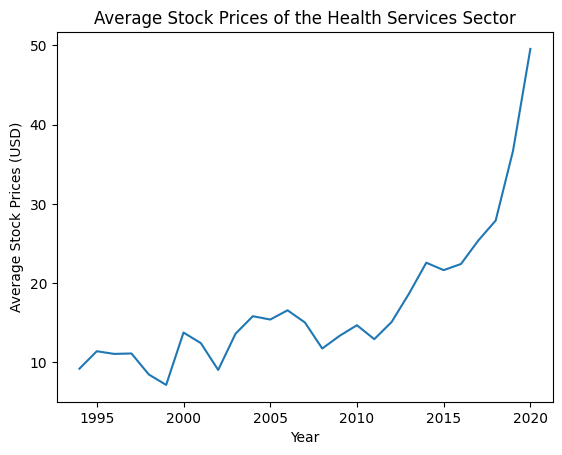

In [11]:
# Calculate average stock price by fiscal year
average_prices_by_year = ff_firms_dataset.groupby("fyear")["prcc_c"].mean()

# Plot average stock price trend for the health services sector
plt.ylabel('Average Stock Prices (USD)')
plt.xlabel('Year')
plt.title('Average Stock Prices of the Health Services Sector')
plt.plot(average_prices_by_year)

The firm affected the most by the 2008 Financial Crisis, as measured by the percentage drop in stock price from 2007 to 2008:

In [12]:
# Compare firm stock prices between 2007 and 2008
prices_2008 = ff_firms_dataset.loc[ff_firms_dataset["fyear"] == 2008, ["gvkey", "prcc_c"]]
prices_2007 = ff_firms_dataset.loc[ff_firms_dataset["fyear"] == 2007, ["gvkey", "prcc_c"]]

# Merge datasets to align 2007 and 2008 prices by firm
prices_2007_2008 = pd.merge(prices_2007, prices_2008, on="gvkey", how="inner")

# Calculate absolute and percentage stock price change
prices_2007_2008["price_drop"] = prices_2007_2008["prcc_c_y"] - prices_2007_2008["prcc_c_x"]
prices_2007_2008["percentage_drop"] = (
    prices_2007_2008["price_drop"] / prices_2007_2008["prcc_c_x"]
) * 100

# Identify firm with the largest percentage decline
min_value = prices_2007_2008.loc[prices_2007_2008["percentage_drop"].idxmin()]
worst_gvkey = min_value["gvkey"]

# Get the firm name
firm_name = ff_firms_dataset.loc[ff_firms_dataset["gvkey"] == worst_gvkey, "conm"].iloc[0]

# Print a clean summary sentence
print(f"\nThe firm that experienced the largest stock price decline between 2007 and 2008 is {firm_name}, "f"with a percentage drop of {min_value['percentage_drop']:.2f}%.\n")


The firm that experienced the largest stock price decline between 2007 and 2008 is INSIGHT HEALTH SVCS HLDG CP, with a percentage drop of -99.33%.



Plotting the average Return on Assets (ROA) for the firms located in the “USA” across the years:

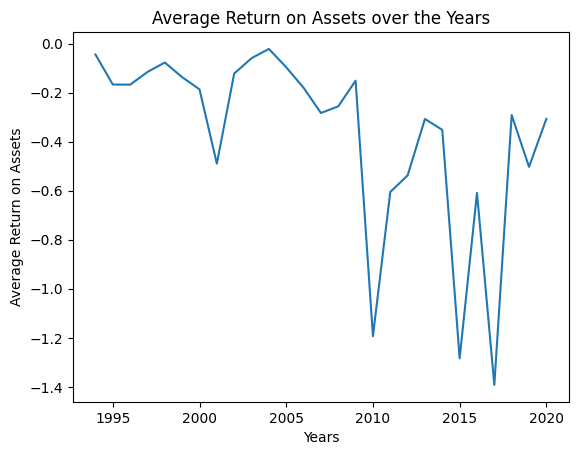

In [13]:
# Filter ROA and fiscal year data for U.S. firms
ROAbyYear = ff_firms_dataset.loc[ff_firms_dataset["location"] == "USA", ["roa", "fyear"]]

# Compute average ROA by year
AvgROAbyYear = ROAbyYear.groupby("fyear")["roa"].mean()

# Plot average ROA trend over timefrom n
plt.ylabel('Average Return on Assets')
plt.xlabel('Years')
plt.title('Average Return on Assets over the Years')
plt.plot(AvgROAbyYear)

### **Part 2. Text Analysis on the Industry Sector**

#### **C. Text Cleaning**

The dataset 'data/2020_10K_item1_full.csv' was loaded as a DataFrame. A new column was created containing the cleaned version of each firm’s Item 1 content. The cleaning process included the following steps:

1. Converting all text to lowercase.

2. Removing punctuation marks.

3. Removing English stopwords based on NLTK’s predefined stopword list.

In [14]:
# Convert SIC codes to string for consistent filtering
public_firms['sic'] = public_firms['sic'].astype(str)
public_firms

# Filter firms where SIC code starts with '80' (health services industry)
filtered_publicfirm = public_firms[public_firms['sic'].str[:2] == "80"]

filtered_publicfirm

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa
1588,1431,1994,USA,AMERICAN CYTOGENETICS,NaN,8071,NaN,0.035,-0.205,1.339,5.454,-0.153099
1589,1431,1995,USA,AMERICAN CYTOGENETICS,NaN,8071,0.031,0.020,-0.484,1.124,4.682,-0.430605
2064,1559,1995,USA,AMERICAN SHARED HSPTL SERV,NaN,8090,1.312,0.452,7.344,31.345,34.077,0.234296
2065,1559,1996,USA,AMERICAN SHARED HSPTL SERV,NaN,8090,1.812,0.368,-0.353,32.969,36.989,-0.010707
2066,1559,1997,USA,AMERICAN SHARED HSPTL SERV,NaN,8090,1.750,0.017,1.522,30.209,37.172,0.050382
...,...,...,...,...,...,...,...,...,...,...,...,...
207946,265008,2011,USA,21ST CENTURY ONCOLOGY HLDGS,2004/06/18,8090,NaN,10.177,-353.441,998.592,644.717,-0.353939
207947,265008,2012,USA,21ST CENTURY ONCOLOGY HLDGS,2004/06/18,8090,NaN,15.410,-154.208,922.301,693.951,-0.167199
207948,265008,2013,USA,21ST CENTURY ONCOLOGY HLDGS,2004/06/18,8090,NaN,17.462,-80.214,1128.191,736.516,-0.071100
207949,265008,2014,USA,21ST CENTURY ONCOLOGY HLDGS,2004/06/18,8090,NaN,99.082,-357.291,1153.444,1018.182,-0.309760


**GenAI Citation:**
Name, version, company of AI tool: ChatGPT-5 |
Chat objective: To understand how we could filter column values based on first two digits |
Use of AI-generated content: Applied the knowledge of string conversion and filtering to create a new dataframe for target industry |
URL of chat history: https://chatgpt.com/share/68dc50ca-ad50-8006-ad55-915c2a9d8977 |
Time and date of chat: September 29, 2025 at 7:12 PM

In [15]:
import nltk
import string
from nltk.corpus import stopwords
nltk.download('stopwords')

# Define punctuation remover and stopword list
translator = str.maketrans('', '', string.punctuation)
sw = stopwords.words('english')

# Text cleaning function: lowercase, remove punctuation and stopwords
def clean_text(text):
    text_lower = text.lower()
    text_no_punctuation = text_lower.translate(translator)   
    clean_words = [w for w in text_no_punctuation.split() if w not in sw] 
    return ' '.join(clean_words)

# Apply cleaning function to create new column
ten_K_Reports['item_1_clean'] = ten_K_Reports['item_1_text'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\parne\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
ten_K_Reports.head()

,cik,year,name,item_1_text,gvkey,item_1_clean
0,1041588,2020,ACCESS-POWER INC,fixed expenses are previosuly documented in an...,66119,fixed expenses previosuly documented 8k 235000...
1,315374,2020,HURCO COMPANIES INC,"General Hurco Companies, Inc. is an internatio...",5788,general hurco companies inc international indu...
2,1622996,2020,"ACRO BIOMEDICAL CO., LTD.",We have been engaged in the business of develo...,27584,engaged business developing marketing products...
3,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614,corporate history chun capital group formerly ...
4,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614,corporate history chun capital group formerly ...


#### **D. Keyword Analysis:**

Creating a new DataFrame that includes only firms in health services industry:

In [17]:
# Merge 10-K report data with filtered public firms on gvkey
merged_publicfirmitems = pd.merge(ten_K_Reports, filtered_publicfirm, on="gvkey", how="inner")

merged_publicfirmitems.head(5)

,cik,year,name,item_1_text,gvkey,item_1_clean,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa
0,1516887,2020,"Wellness Center USA, Inc.","Background. Wellness Center USA, Inc. ( WCUI ...",170692,background wellness center usa inc wcui compan...,2012,USA,WELLNESS CENTER USA INC,NaN,8000,0.8400,0.116,-0.405,8.224,0.090,-0.049246
1,1516887,2020,"Wellness Center USA, Inc.","Background. Wellness Center USA, Inc. ( WCUI ...",170692,background wellness center usa inc wcui compan...,2013,USA,WELLNESS CENTER USA INC,NaN,8000,0.4600,0.499,-2.817,8.689,0.272,-0.324203
2,1516887,2020,"Wellness Center USA, Inc.","Background. Wellness Center USA, Inc. ( WCUI ...",170692,background wellness center usa inc wcui compan...,2014,USA,WELLNESS CENTER USA INC,NaN,8000,0.1082,0.176,-4.862,6.410,0.225,-0.758502
3,1516887,2020,"Wellness Center USA, Inc.","Background. Wellness Center USA, Inc. ( WCUI ...",170692,background wellness center usa inc wcui compan...,2015,USA,WELLNESS CENTER USA INC,NaN,8000,0.1450,0.034,-6.300,0.914,0.433,-6.892779
4,1516887,2020,"Wellness Center USA, Inc.","Background. Wellness Center USA, Inc. ( WCUI ...",170692,background wellness center usa inc wcui compan...,2016,USA,WELLNESS CENTER USA INC,NaN,8000,0.1850,0.089,-2.351,0.230,0.481,-10.221739


**GenAI Citation:**
Name, version, company of AI tool: ChatGPT-5 |
Chat objective: To understand the syntax for how we could apply an inner join to merge two csv files |
Use of AI-generated content: Applied the knowledge of merge function to create a new dataframe |
URL of chat history: https://chatgpt.com/share/68dc22b4-f710-8006-8886-766e1bbb5413 |
Time and date of chat: September 29, 2025 at 9:25 PM

Generating top 10 keywords for each firm based on two different methods: Word counts and TF-IDF score:

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Extract top TF-IDF keywords for each document in a list
def get_keywords_tfidf(document_list):
    vectorizer = TfidfVectorizer() # Create a TF-IDF vectorizer
    tfidf_matrix = vectorizer.fit_transform(document_list) # Compute TF-IDF matrix
    feature_names = vectorizer.get_feature_names_out() # Get vocabulary terms

    top_keywords = [] # Store top keywords per document
    for i in range(len(document_list)):
        feature_index = tfidf_matrix[i, :].nonzero()[1]
        feature_value = [tfidf_matrix[i, x] for x in feature_index]
        tfidf_scores = zip(feature_index, feature_value)
        sorted_tfidf_scores = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)
        top_keywords.append(' '.join([feature_names[i] for i, _ in sorted_tfidf_scores[:10]]))

        # Log progress every 200 documents
        if i % 200 == 199:
            print(f'Processed {i+1}/{len(document_list)} documents.')
    
    return top_keywords

In [19]:
# Generate top 10 TF-IDF keywords for each firm's cleaned Item 1 text
top10_keywords = get_keywords_tfidf(merged_publicfirmitems['item_1_clean'])
print(top10_keywords)

# Add TF-IDF keywords as a new column in the merged dataset
merged_publicfirmitems['TFIDF_Keywords'] = top10_keywords

merged_publicfirmitems.head(5)

Processed 200/1218 documents.
Processed 400/1218 documents.
Processed 600/1218 documents.
Processed 800/1218 documents.
Processed 1000/1218 documents.
Processed 1200/1218 documents.
['psi microparticle psorialight dti mark sci uv gen2 phototherapy neo', 'psi microparticle psorialight dti mark sci uv gen2 phototherapy neo', 'psi microparticle psorialight dti mark sci uv gen2 phototherapy neo', 'psi microparticle psorialight dti mark sci uv gen2 phototherapy neo', 'psi microparticle psorialight dti mark sci uv gen2 phototherapy neo', 'psi microparticle psorialight dti mark sci uv gen2 phototherapy neo', 'psi microparticle psorialight dti mark sci uv gen2 phototherapy neo', 'nursing skilled services facilities care living medicare operations pennant senior', 'nursing skilled services facilities care living medicare operations pennant senior', 'nursing skilled services facilities care living medicare operations pennant senior', 'nursing skilled services facilities care living medicare oper

,cik,year,name,item_1_text,gvkey,item_1_clean,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa,TFIDF_Keywords
0,1516887,2020,"Wellness Center USA, Inc.","Background. Wellness Center USA, Inc. ( WCUI ...",170692,background wellness center usa inc wcui compan...,2012,USA,WELLNESS CENTER USA INC,NaN,8000,0.8400,0.116,-0.405,8.224,0.090,-0.049246,psi microparticle psorialight dti mark sci uv ...
1,1516887,2020,"Wellness Center USA, Inc.","Background. Wellness Center USA, Inc. ( WCUI ...",170692,background wellness center usa inc wcui compan...,2013,USA,WELLNESS CENTER USA INC,NaN,8000,0.4600,0.499,-2.817,8.689,0.272,-0.324203,psi microparticle psorialight dti mark sci uv ...
2,1516887,2020,"Wellness Center USA, Inc.","Background. Wellness Center USA, Inc. ( WCUI ...",170692,background wellness center usa inc wcui compan...,2014,USA,WELLNESS CENTER USA INC,NaN,8000,0.1082,0.176,-4.862,6.410,0.225,-0.758502,psi microparticle psorialight dti mark sci uv ...
3,1516887,2020,"Wellness Center USA, Inc.","Background. Wellness Center USA, Inc. ( WCUI ...",170692,background wellness center usa inc wcui compan...,2015,USA,WELLNESS CENTER USA INC,NaN,8000,0.1450,0.034,-6.300,0.914,0.433,-6.892779,psi microparticle psorialight dti mark sci uv ...
4,1516887,2020,"Wellness Center USA, Inc.","Background. Wellness Center USA, Inc. ( WCUI ...",170692,background wellness center usa inc wcui compan...,2016,USA,WELLNESS CENTER USA INC,NaN,8000,0.1850,0.089,-2.351,0.230,0.481,-10.221739,psi microparticle psorialight dti mark sci uv ...


In [20]:
# Remove duplicate keyword strings while preserving order
unique = set()
cleaned_top10_keywords_tfidf = []

for item in top10_keywords:
    if item not in unique:
        cleaned_top10_keywords_tfidf.append(item)
        unique.add(item)

cleaned_top10_keywords_tfidf

['psi microparticle psorialight dti mark sci uv gen2 phototherapy neo',
 'nursing skilled services facilities care living medicare operations pennant senior',
 'care hospice health home medicare payment services amedisys patient claims',
 'living communities senior care services residents memory home community health',
 'workflows customers customer platform ip services servicenow enterprise applications management',
 'services testing healthcare diagnostic health laboratory information idns including clinical',
 'rehabilitation ltch illness hospitals hospital ltchs concentra services ltchpps payment',
 'hospitals care services hospital medicare ebitda payment healthcare may net',
 'care health services hospitals president vice medicare hospital served federal',
 'dialysis esrd services patients kidney medicare davita centers us care',
 'nursing skilled care facilities services living health nhc assisted medicare',
 'conifer npa healthcare hospitals services care hospital owned tenet t

In [21]:
from collections import Counter

# Extract top 10 most frequent words from a given text
def get_top_keywords(sentence) : 
    words = sentence.split()
    c = Counter(words)
    lst = c.most_common(10)
    keywords = []
    for pair in lst :
        keywords.append(pair[0])
    return " ".join(keywords)

# Add top word-count keywords for each firm's cleaned Item 1 text
merged_publicfirmitems["WordCount_keywords"] = merged_publicfirmitems["item_1_clean"].apply(get_top_keywords)
print(merged_publicfirmitems[["WordCount_keywords"]])

# Store word-count keyword results for further analysis
top10_keywordscount = merged_publicfirmitems[["WordCount_keywords"]]

merged_publicfirmitems_wordcount = merged_publicfirmitems
merged_publicfirmitems_wordcount.head()

                                     WordCount_keywords
0     psi mark company microparticle psorialight dti...
1     psi mark company microparticle psorialight dti...
2     psi mark company microparticle psorialight dti...
3     psi mark company microparticle psorialight dti...
4     psi mark company microparticle psorialight dti...
...                                                 ...
1213  services government health contracts employees...
1214  health services canada agreement license compa...
1215  health services canada agreement license compa...
1216  health services canada agreement license compa...
1217  health services canada agreement license compa...

[1218 rows x 1 columns]


,cik,year,name,item_1_text,gvkey,item_1_clean,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa,TFIDF_Keywords,WordCount_keywords
0,1516887,2020,"Wellness Center USA, Inc.","Background. Wellness Center USA, Inc. ( WCUI ...",170692,background wellness center usa inc wcui compan...,2012,USA,WELLNESS CENTER USA INC,NaN,8000,0.8400,0.116,-0.405,8.224,0.090,-0.049246,psi microparticle psorialight dti mark sci uv ...,psi mark company microparticle psorialight dti...
1,1516887,2020,"Wellness Center USA, Inc.","Background. Wellness Center USA, Inc. ( WCUI ...",170692,background wellness center usa inc wcui compan...,2013,USA,WELLNESS CENTER USA INC,NaN,8000,0.4600,0.499,-2.817,8.689,0.272,-0.324203,psi microparticle psorialight dti mark sci uv ...,psi mark company microparticle psorialight dti...
2,1516887,2020,"Wellness Center USA, Inc.","Background. Wellness Center USA, Inc. ( WCUI ...",170692,background wellness center usa inc wcui compan...,2014,USA,WELLNESS CENTER USA INC,NaN,8000,0.1082,0.176,-4.862,6.410,0.225,-0.758502,psi microparticle psorialight dti mark sci uv ...,psi mark company microparticle psorialight dti...
3,1516887,2020,"Wellness Center USA, Inc.","Background. Wellness Center USA, Inc. ( WCUI ...",170692,background wellness center usa inc wcui compan...,2015,USA,WELLNESS CENTER USA INC,NaN,8000,0.1450,0.034,-6.300,0.914,0.433,-6.892779,psi microparticle psorialight dti mark sci uv ...,psi mark company microparticle psorialight dti...
4,1516887,2020,"Wellness Center USA, Inc.","Background. Wellness Center USA, Inc. ( WCUI ...",170692,background wellness center usa inc wcui compan...,2016,USA,WELLNESS CENTER USA INC,NaN,8000,0.1850,0.089,-2.351,0.230,0.481,-10.221739,psi microparticle psorialight dti mark sci uv ...,psi mark company microparticle psorialight dti...


In [22]:
# Convert WordCount keywords column to a list
keywords_list_wordcount = merged_publicfirmitems["WordCount_keywords"].tolist()
keywords_list_wordcount

# Remove duplicate keyword strings while preserving order
unique = set()
cleaned_top10_keywords_wordcount = []

for item in keywords_list_wordcount:
    if item not in unique:
        cleaned_top10_keywords_wordcount.append(item)
        unique.add(item)

cleaned_top10_keywords_wordcount

['psi mark company microparticle psorialight dti technology patent sci uv',
 'services care facilities nursing skilled medicare operations quality medicaid state',
 'care health home medicare payment services hospice patient federal patients',
 'communities living services care senior health may residents community home',
 'customers services customer management platform service products workflows applications product',
 'services healthcare health information testing including clinical diagnostic laboratory solutions',
 'rehabilitation services hospitals hospital payment medicare care patients recovery critical',
 'hospitals care services hospital medicare healthcare payment may programs patient',
 'care health services hospitals medicare may hospital federal president medicaid',
 'dialysis services patients medicare us centers esrd care business federal',
 'care facilities nursing services health skilled medicare living payment 2019',
 'healthcare services care hospitals conifer hosp

**GenAI Citation:**
Name, version, company of AI tool: ChatGPT-5 |
Chat objective: To understand the syntax for deleting duplicate rows on Python |
Use of AI-generated content: Applied the knowledge to clean the column and convert it into a list that could be used for keyword analysis |
URL of chat history: https://chatgpt.com/share/68dc96ea-2e74-8006-8793-8ae2e29e98da |
Time and date of chat: September 30, 2025 at 7:25 PM

Creating two wordclouds to visualize the keywords across all firms in the health services industry: one based on the word counts and another based on the TF-IDF scores:

Word Cloud for keywords generated from word count method


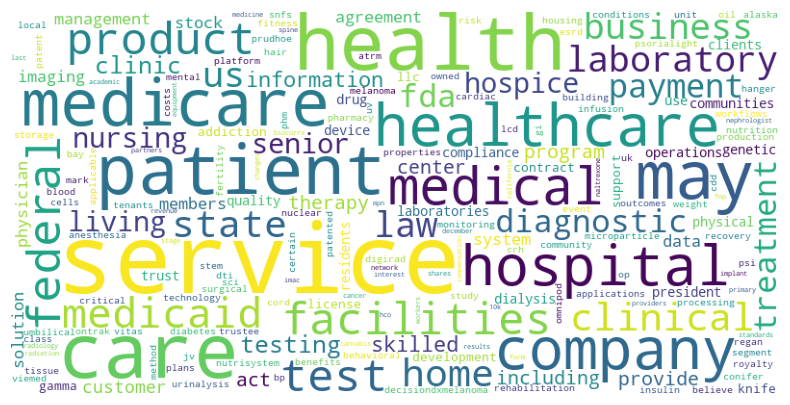


Word Cloud for keywords generated from TF-IDF method


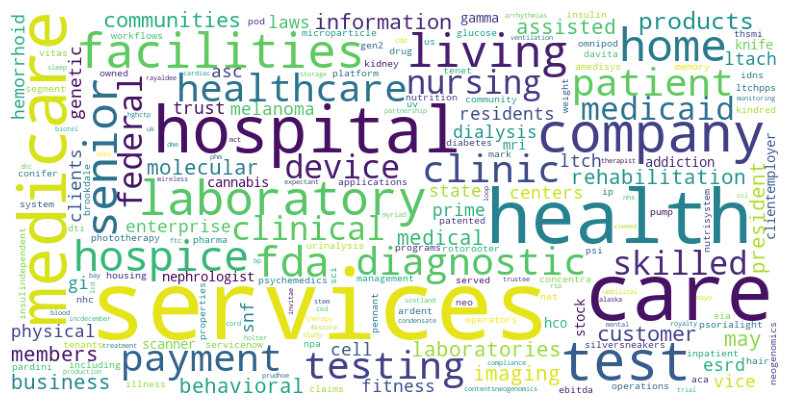

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all keywords from word count method into a single string
text = " ".join(cleaned_top10_keywords_wordcount)

# Word cloud based on most frequent words
print("Word Cloud for keywords generated from word count method")
wordcloud1 = WordCloud(width=800, height=400, max_font_size=100, background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.axis("off")
plt.imshow(wordcloud1)
# plt.savefig("wordcount_keywords.png")  # optional: save output
plt.show()

# Word cloud based on TF-IDF keywords
print("\nWord Cloud for keywords generated from TF-IDF method")
text2 = " ".join(cleaned_top10_keywords_tfidf)

wordcloud2 = WordCloud(width=800, height=400, max_font_size=100, background_color="white").generate(text2)

plt.figure(figsize=(10, 5))
plt.axis("off")
plt.imshow(wordcloud2)
# plt.savefig("tfidf_keywords.png")  # optional: save output
plt.show()

#### **E. Word embedding:**

Training a word2vec model with the full 10-K sample:

In [24]:
from gensim.models import Word2Vec

# Training code shown for reference; model already provided in repo

# docs = [row.split() for row in ten_K_Reports['item_1_clean']]
# model = Word2Vec(docs, min_count=5, vector_size=50, workers=3, window=5, sg = 1)
# model.save("word2vec.model")

# load model from stored file
model = Word2Vec.load("word2vec.model")

Utilizing the trained word2vec model to find the most relevant five words for each of the following three keywords:

In [25]:
model.wv.most_similar('hospital', topn = 5)

[('inpatient', 0.8583006858825684),
 ('outpatient', 0.8414944410324097),
 ('hospitals', 0.8135916590690613),
 ('convalescence', 0.8083689212799072),
 ('nursing', 0.8078191876411438)]

In [26]:
model.wv.most_similar('healthcare', topn = 5)

[('care', 0.816652238368988),
 ('postacute', 0.7931357622146606),
 ('medicaid', 0.7864112854003906),
 ('needbased', 0.7820541858673096),
 ('payer', 0.7708024382591248)]

In [27]:
model.wv.most_similar('test', topn = 5)

[('tests', 0.8287420272827148),
 ('diagnostic', 0.7986863851547241),
 ('testing', 0.7925555109977722),
 ('guardantomni', 0.7805489301681519),
 ('nevome', 0.7772268056869507)]

### **Part 3. Comprehensive Analysis of One Sample Firm**

#### **F. Firm Analysis and Strategy Suggestion**

Examining the current market status of 'AMEDISYS INC' and providing strategic recommendation for future growth:

In [28]:
# Create a new dataframe with only 'name' and 'WordCount_keywords', no duplicates
unique_firm_keywords = merged_publicfirmitems[['name', 'WordCount_keywords']].drop_duplicates().copy()
unique_firm_keywords.head(5)

,name,WordCount_keywords
0,"Wellness Center USA, Inc.",psi mark company microparticle psorialight dti...
7,"ENSIGN GROUP, INC",services care facilities nursing skilled medic...
22,AMEDISYS INC,care health home medicare payment services hos...
48,Brookdale Senior Living Inc.,communities living services care senior health...
65,"MEDNAX, INC.",customers services customer management platfor...


In [29]:
# Split the WordCount_keywords string into a list of words and create a new column
unique_firm_keywords['top_keywords_list'] = unique_firm_keywords['WordCount_keywords'].str.split(" ")
unique_firm_keywords.head(5)

,name,WordCount_keywords,top_keywords_list
0,"Wellness Center USA, Inc.",psi mark company microparticle psorialight dti...,"[psi, mark, company, microparticle, psorialigh..."
7,"ENSIGN GROUP, INC",services care facilities nursing skilled medic...,"[services, care, facilities, nursing, skilled,..."
22,AMEDISYS INC,care health home medicare payment services hos...,"[care, health, home, medicare, payment, servic..."
48,Brookdale Senior Living Inc.,communities living services care senior health...,"[communities, living, services, care, senior, ..."
65,"MEDNAX, INC.",customers services customer management platfor...,"[customers, services, customer, management, pl..."


In [30]:
# Create a function to get word embeddings for each keyword using the word2vec model 
import numpy as np

def get_keyword_embedding(keyword, model):
    if keyword in model.wv :
        return model.wv[keyword]  # Word2Vec vector
    else :
        return np.zeros(model.vector_size) # Returns zero vector if the keyword is not in the model's vocabulary

**GenAI Citation:**
Name, version, company of AI tool: ChatGPT-5 |
Chat objective: To get an idea of how to convert the keywords for each firm into word embeddings with the word2vec model. |
Use of AI-generated content: Used it to create the 'get_keyword_embedding' function |
URL of chat history: https://chatgpt.com/share/68df6893-0888-8011-a0c2-67f92b0b8219 |
Time and date of chat: September 30, 2025 at 12:00 PM

In [31]:
# Create a new column 'firm_embedding' after getting word embeddings for each keyword using the function 'get_keyword_embedding'
firm_embeddings = [
    np.sum([get_keyword_embedding(k, model) for k in kws], axis=0)
    for kws in unique_firm_keywords['top_keywords_list']
]
unique_firm_keywords['firm_embedding'] = firm_embeddings
unique_firm_keywords.head(5)

,name,WordCount_keywords,top_keywords_list,firm_embedding
0,"Wellness Center USA, Inc.",psi mark company microparticle psorialight dti...,"[psi, mark, company, microparticle, psorialigh...","[0.11889425, 0.06278841, -2.8213835, -0.299838..."
7,"ENSIGN GROUP, INC",services care facilities nursing skilled medic...,"[services, care, facilities, nursing, skilled,...","[0.8704801, 3.3181117, -0.26965368, 1.7506356,..."
22,AMEDISYS INC,care health home medicare payment services hos...,"[care, health, home, medicare, payment, servic...","[1.5849311, 0.78401244, -1.2433116, -1.2630965..."
48,Brookdale Senior Living Inc.,communities living services care senior health...,"[communities, living, services, care, senior, ...","[-1.8705199, 1.4423432, -0.121002324, -0.22553..."
65,"MEDNAX, INC.",customers services customer management platfor...,"[customers, services, customer, management, pl...","[-2.9929938, 3.0110073, -0.14577535, 1.3431187..."


**GenAI Citation:**
Name, version, company of AI tool: ChatGPT-5 |
Chat objective: To get an idea of how to create a new column where each row stores the firm-level embedding vectors |
Use of AI-generated content: Instead of using the lambda function approach suggested by ChatGPT, I implemented a for-loop (via list comprehension) to generate firm embeddings by summing the embeddings of each firm’s keywords. |
URL of chat history: https://chatgpt.com/share/68df6893-0888-8011-a0c2-67f92b0b8219 |
Time and date of chat: September 30, 2025 at 1:00 PM

In [32]:
# Create a firm_embeddings_dict
firm_embeddings_dict = {row['name']: row['firm_embedding'] for _, row in unique_firm_keywords.iterrows()}

In [33]:
# Add firm embeddings to a KeyedVectors object
from gensim.models import KeyedVectors

kv = KeyedVectors(vector_size=model.vector_size)

# Convert dict into names + stacked matrix
firm_names = list(firm_embeddings_dict.keys())
firm_vectors = np.vstack(list(firm_embeddings_dict.values()))

# Add to KeyedVectors
kv.add_vectors(firm_names, firm_vectors)


**GenAI Citation:**
Name, version, company of AI tool: ChatGPT-5 |
Chat objective: I inquired about how I could perform operations on word embeddings, such as .most_similar. |
Use of AI-generated content: To use similarity queries, I created a KeyedVectors object, which allowed me to apply the '.most_similar' method on the firm-level embeddings. | URL of chat history: https://chatgpt.com/share/68df6893-0888-8011-a0c2-67f92b0b8219 | Time and date of chat: September 30, 2025 at 5:00 PM

In [35]:
# Find top 10 most similar firms to 'AMEDISYS INC'
kv.most_similar('AMEDISYS INC', topn=10)

[('LHC Group, Inc', 0.9932073950767517),
 ('Encompass Health Corp', 0.9778308868408203),
 ('COMMUNITY HEALTH SYSTEMS INC', 0.9615166187286377),
 ('Pennant Group, Inc.', 0.9611970782279968),
 ('Addus HomeCare Corp', 0.9572924375534058),
 ('HCA Healthcare, Inc.', 0.9422683715820312),
 ('Diversicare Healthcare Services, Inc.', 0.9418888092041016),
 ('DAVITA INC.', 0.9416425824165344),
 ('Quorum Health Corp', 0.9403476715087891),
 ('NATIONAL HEALTHCARE CORP', 0.9364181160926819)]

In [36]:
# Calculate Market Share
selected_companies = ['AMEDISYS INC', 'LHC Group, Inc', 'Encompass Health Corp', 'COMMUNITY HEALTH SYSTEMS INC', 'Pennant Group, Inc.', 'Addus HomeCare Corp', 
                      'HCA Healthcare, Inc.', 'Diversicare Healthcare Services, Inc.', 'DAVITA INC.', 'Quorum Health Corp', 'NATIONAL HEALTHCARE CORP']
selected_years = [2018, 2019, 2020]

ff_firms_dataset_filtered = ff_firms_dataset[(ff_firms_dataset['fyear'].isin(selected_years)) & (ff_firms_dataset['conm'].isin(selected_companies))].copy()

def calc_market_share(x):
    return (x / x.sum()) * 100

ff_firms_dataset_filtered['market_share'] = ff_firms_dataset_filtered.groupby('fyear')['sale'].transform(calc_market_share)

print(ff_firms_dataset_filtered[['conm','fyear','sale','roa','market_share']].sort_values('fyear'))


                                conm  fyear       sale       roa  market_share
27229       NATIONAL HEALTHCARE CORP   2018    978.681  0.054548      5.826194
80322   COMMUNITY HEALTH SYSTEMS INC   2018  14155.000 -0.049688     84.266255
107519                  AMEDISYS INC   2018   1664.265  0.166424      9.907551
27230       NATIONAL HEALTHCARE CORP   2019    996.383  0.053014      6.162473
80323   COMMUNITY HEALTH SYSTEMS INC   2019  13210.000 -0.043244     81.701787
107520                  AMEDISYS INC   2019   1962.174  0.100442     12.135740
27231       NATIONAL HEALTHCARE CORP   2020    977.928  0.030739      6.590501
80324   COMMUNITY HEALTH SYSTEMS INC   2020  11789.000  0.031926     79.449015
107521                  AMEDISYS INC   2020   2071.519  0.117157     13.960484


The text embedding similarity step returned several close competitors to AMEDISYS INC, but only two had complete financial data for 2018 to 2020. These firms form the usable peer group for comparison. The following analysis compares revenue, ROA, and market share trends to evaluate Amedisys’ position and highlight potential growth directions.

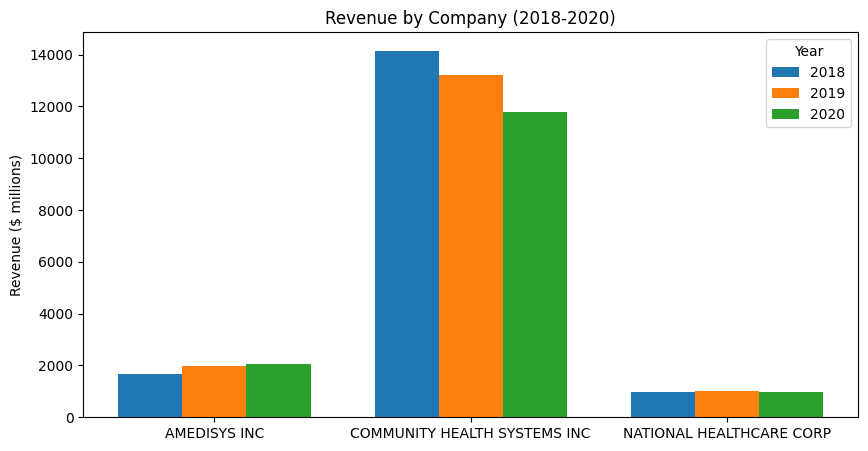

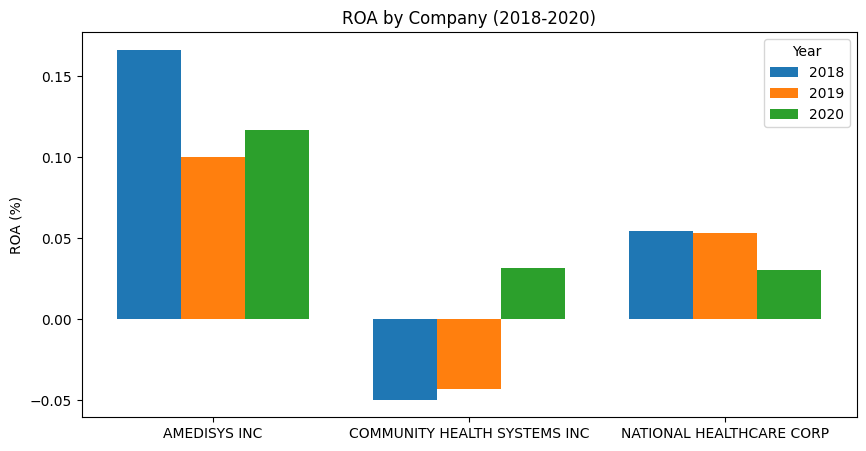

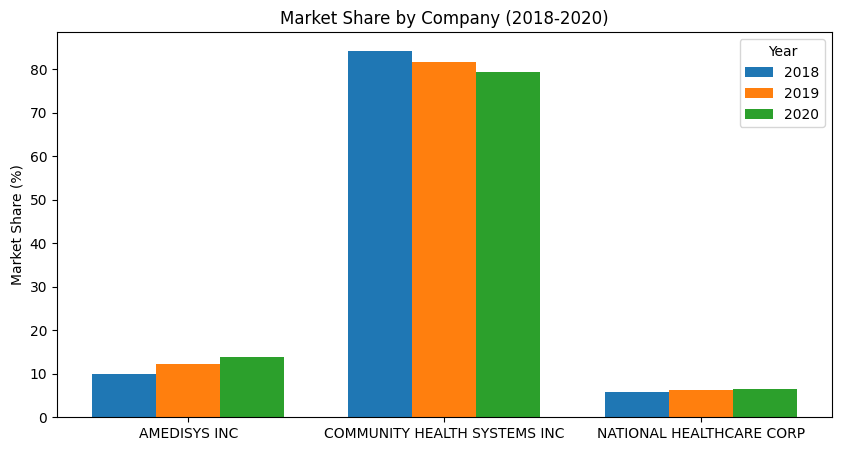

In [37]:
# Pivot for sales
df_sale = ff_firms_dataset_filtered.pivot(index='conm', columns='fyear', values='sale')

# Pivot for ROA
df_roa = ff_firms_dataset_filtered.pivot(index='conm', columns='fyear', values='roa')

# Pivot for market_share
df_ms = ff_firms_dataset_filtered.pivot(index='conm', columns='fyear', values='market_share')

# Plotting Revenue grouped bar chart
companies = df_sale.index
years = df_sale.columns
x = np.arange(len(companies))
width = 0.25

fig, ax = plt.subplots(figsize=(10,5))
for i, year in enumerate(years):
    ax.bar(x + i*width, df_sale[year], width, label=year)
ax.set_xticks(x + width)
ax.set_xticklabels(companies)
ax.set_ylabel('Revenue ($ millions)')
ax.set_title('Revenue by Company (2018-2020)')
ax.legend(title='Year')
plt.show()

# Plotting ROA grouped bar chart
fig, ax = plt.subplots(figsize=(10,5))
for i, year in enumerate(years):
    ax.bar(x + i*width, df_roa[year], width, label=year)
ax.set_xticks(x + width)
ax.set_xticklabels(companies)
ax.set_ylabel('ROA (%)')
ax.set_title('ROA by Company (2018-2020)')
ax.legend(title='Year')
plt.show()

# Plotting Market Share grouped bar chart
fig, ax = plt.subplots(figsize=(10,5))
for i, year in enumerate(years):
    ax.bar(x + i*width, df_ms[year], width, label=year)

ax.set_xticks(x + width)
ax.set_xticklabels(companies)
ax.set_ylabel('Market Share (%)')
ax.set_title('Market Share by Company (2018-2020)')
ax.legend(title='Year')
plt.show()

**GenAI Citation:**
Name, version, company of AI tool: ChatGPT-5 |
Chat objective: To get the syntax of pivoting data & creating grouped bar charts |
Use of AI-generated content: I created three dataframes using the pivot method and generated three grouped bar charts comparing the revenue, ROA, and market share of six companies. | URL of chat history: https://chatgpt.com/share/68e04d64-5e90-8011-b6ac-a4fe87f2d25e | Time and date of chat: October 03, 2025 at 3:00 PM

##### **Amedisys Competitive Analysis Summary (2018 to 2020)**

The three charts highlight how Amedisys compares with its closest competitors based on available data from 2018 to 2020.

**Revenue Trends**

Amedisys shows steady revenue growth over the three years. Although it is much smaller than Community Health Systems, it continues to expand its top line at a consistent pace. National Healthcare Corp is stable but grows more slowly. Amedisys operates as a focused provider, not a scale-driven system, and its revenue trend supports this positioning.

**ROA Trends**

Amedisys clearly outperforms both competitors in asset productivity and earnings quality. ROA is highest in all three years, with a strong peak in 2018, a temporary decline in 2019, and a recovery in 2020. Community Health Systems records negative ROA in 2018 and 2019 and only returns to a modest positive level in 2020. National Healthcare Corp maintains positive ROA but remains below Amedisys. This indicates a superior operating model and effective use of assets.

**Market Share Trends**

Within the peer group, Amedisys increases its relative market share each year. Community Health Systems remains the largest by revenue, but its share declines over time. National Healthcare Corp stays small and stable. Amedisys demonstrates rising influence within this comparison group.

##### **Strategic Recommendations for Amedisys**

Based on the performance patterns above, Amedisys is in a strong position and can consider the following strategic actions:

**1. Expand core home-based care services**

The company shows strong profitability within its specialty areas. Continued investment in home health, hospice, and personal care should support sustainable growth.

**2. Pursue selective acquisitions and regional expansion**

Since the company is much smaller than large hospital systems, growth through acquisition or market entry in underserved regions can accelerate scale and strengthen market presence.

**3. Maintain operational efficiency**

ROA results show that efficiency is a competitive advantage. Continued focus on workforce optimization, technology adoption, and cost management will help preserve strong margins as the company grows.

**4. Build stronger value-based care partnerships**

Amedisys is well suited for value-based contracts because of its efficiency and outcomes focus. Expanding Medicare Advantage relationships and bundled-payment programs can improve revenue stability.

**5. Differentiate through quality and patient outcomes**

Large competitors show weaker performance and lower efficiency. Amedisys can continue to emphasize high-quality home-based care to attract partnerships, referrals, and long-term contracts.